In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime

In [139]:
df = yf.download(tickers=['^NSEI'], start = '2024-10-14', end = '2024-10-19', interval="1m")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-14 09:15:00+05:30,25027.650391,25047.199219,25020.750000,25039.699219,25039.699219,0
2024-10-14 09:16:00+05:30,25040.199219,25065.099609,25038.949219,25061.349609,25061.349609,0
2024-10-14 09:17:00+05:30,25061.650391,25066.449219,25056.250000,25058.900391,25058.900391,0
2024-10-14 09:18:00+05:30,25059.150391,25063.750000,25054.150391,25056.050781,25056.050781,0
2024-10-14 09:19:00+05:30,25057.199219,25060.050781,25054.349609,25055.949219,25055.949219,0


In [140]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
df

,Close
Datetime,
2024-10-14 09:15:00+05:30,25039.699219
2024-10-14 09:16:00+05:30,25061.349609
2024-10-14 09:17:00+05:30,25058.900391
2024-10-14 09:18:00+05:30,25056.050781
2024-10-14 09:19:00+05:30,25055.949219
...,...
2024-10-18 15:25:00+05:30,24875.550781
2024-10-18 15:26:00+05:30,24866.400391
2024-10-18 15:27:00+05:30,24869.400391


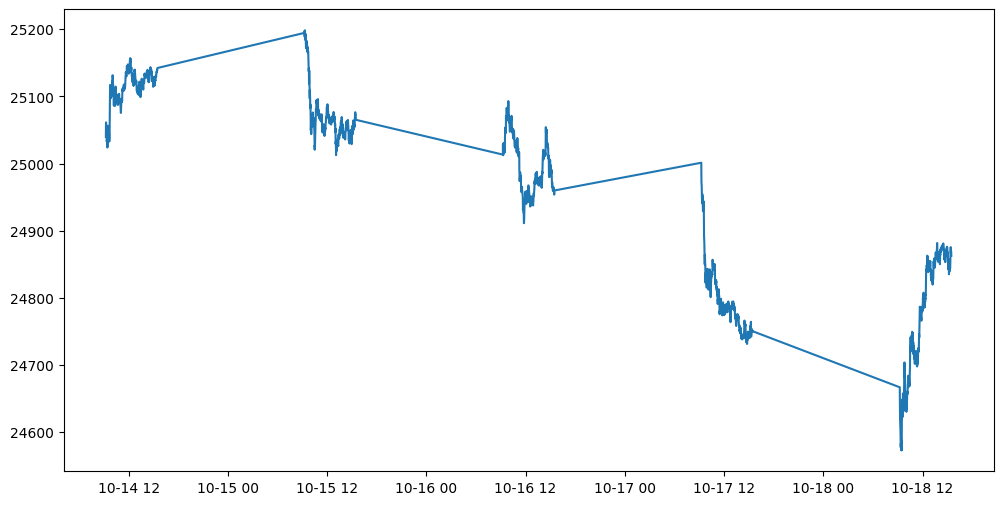

In [141]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)

In [142]:
df['5-min'] = df['Close'].rolling(5).mean()
df['3-min'] = df['Close'].rolling(3).mean()
df

,Close,5-min,3-min
Datetime,,,
2024-10-14 09:15:00+05:30,25039.699219,NaN,NaN
2024-10-14 09:16:00+05:30,25061.349609,NaN,NaN
2024-10-14 09:17:00+05:30,25058.900391,NaN,25053.316406
2024-10-14 09:18:00+05:30,25056.050781,NaN,25058.766927
2024-10-14 09:19:00+05:30,25055.949219,25054.389844,25056.966797
...,...,...,...
2024-10-18 15:25:00+05:30,24875.550781,24864.150391,24873.150391
2024-10-18 15:26:00+05:30,24866.400391,24868.320312,24872.367188
2024-10-18 15:27:00+05:30,24869.400391,24871.050391,24870.450521


In [143]:
df['signal'] = np.where(df['3-min'] > df['5-min'], 1, 0)
df['signal'] = np.where(df['3-min'] < df['5-min'], -1, df['signal'])
df.dropna(inplace=True)
df.head()

,Close,5-min,3-min,signal
Datetime,,,,
2024-10-14 09:19:00+05:30,25055.949219,25054.389844,25056.966797,1
2024-10-14 09:20:00+05:30,25042.599609,25054.969922,25051.533203,-1
2024-10-14 09:21:00+05:30,25032.949219,25049.289844,25043.832682,-1
2024-10-14 09:22:00+05:30,25033.449219,25044.199609,25036.332682,-1
2024-10-14 09:23:00+05:30,25032.199219,25039.429297,25032.865885,-1


In [144]:
df['return'] = np.log(df['Close']).diff()
df['signal-return'] = df['return'] * df['signal']
df.tail()

,Close,5-min,3-min,signal,return,signal-return
Datetime,,,,,,
2024-10-18 15:25:00+05:30,24875.550781,24864.150391,24873.150391,1,0.000016,0.000016
2024-10-18 15:26:00+05:30,24866.400391,24868.320312,24872.367188,1,-0.000368,-0.000368
2024-10-18 15:27:00+05:30,24869.400391,24871.050391,24870.450521,-1,0.000121,-0.000121
2024-10-18 15:28:00+05:30,24869.150391,24871.130469,24868.317057,-1,-0.000010,0.000010
2024-10-18 15:29:00+05:30,24862.650391,24868.630469,24867.067057,-1,-0.000261,0.000261


In [145]:
df['entry'] = df.signal.diff()
df

,Close,5-min,3-min,signal,return,signal-return,entry
Datetime,,,,,,,
2024-10-14 09:19:00+05:30,25055.949219,25054.389844,25056.966797,1,NaN,NaN,NaN
2024-10-14 09:20:00+05:30,25042.599609,25054.969922,25051.533203,-1,-0.000533,0.000533,-2.0
2024-10-14 09:21:00+05:30,25032.949219,25049.289844,25043.832682,-1,-0.000385,0.000385,0.0
2024-10-14 09:22:00+05:30,25033.449219,25044.199609,25036.332682,-1,0.000020,-0.000020,0.0
2024-10-14 09:23:00+05:30,25032.199219,25039.429297,25032.865885,-1,-0.000050,0.000050,0.0
...,...,...,...,...,...,...,...
2024-10-18 15:25:00+05:30,24875.550781,24864.150391,24873.150391,1,0.000016,0.000016,0.0
2024-10-18 15:26:00+05:30,24866.400391,24868.320312,24872.367188,1,-0.000368,-0.000368,0.0
2024-10-18 15:27:00+05:30,24869.400391,24871.050391,24870.450521,-1,0.000121,-0.000121,-2.0


NameError: name 'ma5' is not defined

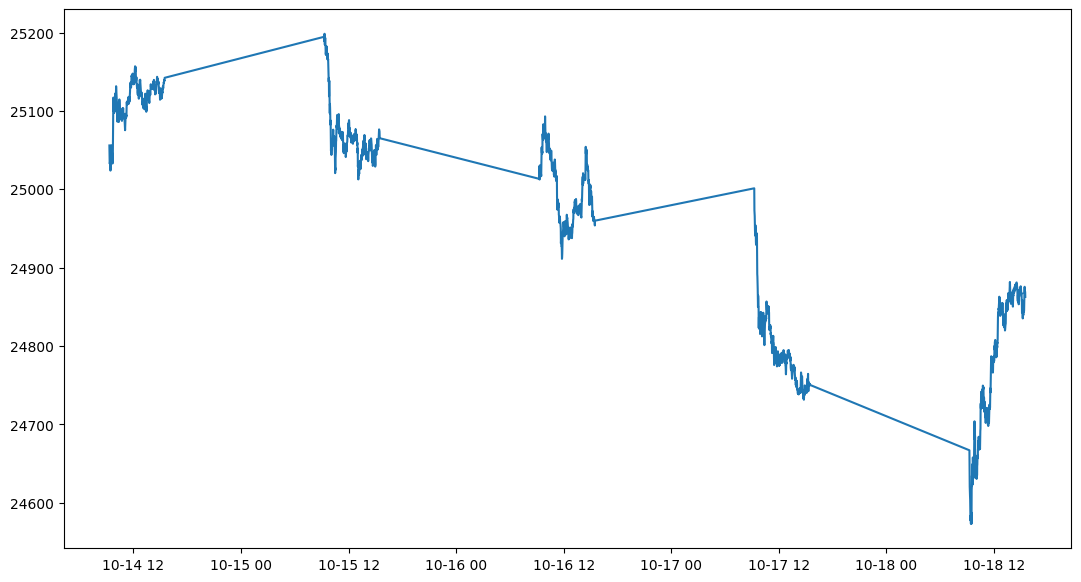

In [146]:
plt.figure(figsize = (13, 7))
plt.plot(df.Close)
plt.plot(ma5, 'r')
plt.plot(ma3, 'y')
plt.plot(df['3-min'][df.entry == 2], '^', color = 'g', markersize = 7)
plt.plot(df['5-min'][df.entry == -2], '^', color = 'r', markersize = 7)

In [147]:
df['buy'] = (df['3-min'][df.entry == 2]).astype(int)
df['sell'] = (df['3-min'][df.entry == -2]).astype(int)
df[1:50]

,Close,5-min,3-min,signal,return,signal-return,entry,buy,sell
Datetime,,,,,,,,,
2024-10-14 09:20:00+05:30,25042.599609,25054.969922,25051.533203,-1,-0.000533,0.000533,-2.0,NaN,25051.0
2024-10-14 09:21:00+05:30,25032.949219,25049.289844,25043.832682,-1,-0.000385,0.000385,0.0,NaN,NaN
2024-10-14 09:22:00+05:30,25033.449219,25044.199609,25036.332682,-1,0.000020,-0.000020,0.0,NaN,NaN
2024-10-14 09:23:00+05:30,25032.199219,25039.429297,25032.865885,-1,-0.000050,0.000050,0.0,NaN,NaN
2024-10-14 09:24:00+05:30,25046.949219,25037.629297,25037.532552,-1,0.000589,-0.000589,0.0,NaN,NaN
2024-10-14 09:25:00+05:30,25038.349609,25036.779297,25039.166016,1,-0.000343,-0.000343,2.0,25039.0,NaN
2024-10-14 09:26:00+05:30,25023.849609,25034.959375,25036.382812,1,-0.000579,-0.000579,0.0,NaN,NaN
2024-10-14 09:27:00+05:30,25025.400391,25033.349609,25029.199870,-1,0.000062,-0.000062,-2.0,NaN,25029.0
2024-10-14 09:28:00+05:30,25036.900391,25034.289844,25028.716797,-1,0.000459,-0.000459,0.0,NaN,NaN


In [148]:
df.buy.unique()

array([   nan, 25039., 25034., 25053., 25049., 25107., 25109., 25104.,
       25093., 25100., 25091., 25098., 25099., 25094., 25084., 25110.,
       25112., 25113., 25115., 25132., 25143., 25137., 25138., 25142.,
       25153., 25139., 25124., 25121., 25108., 25103., 25125., 25131.,
       25127., 25123., 25122., 25120., 25193., 25191., 25174., 25171.,
       25054., 25060., 25063., 25070., 25065., 25030., 25077., 25071.,
       25068., 25052., 25048., 25064., 25066., 25062., 25067., 25019.,
       25020., 25028., 25040., 25044., 25036., 25043., 25037., 25047.,
       25055., 25061., 25024., 25021., 25072., 25074., 25075., 25057.,
       25026., 25022., 25015., 24980., 24962., 24934., 24919., 24945.,
       24947., 24940., 24942., 24957., 24972., 24970., 24974., 24965.,
       25014., 25013., 25029., 24991., 24987., 24961., 24971., 24948.,
       24858., 24833., 24835., 24836., 24817., 24809., 24847., 24848.,
       24822., 24797., 24780., 24781., 24778., 24782., 24783., 24789.,
      

In [149]:
df['trade'] = df['buy'].fillna(df['sell']).combine_first(df['sell'])
df

,Close,5-min,3-min,signal,return,signal-return,entry,buy,sell,trade
Datetime,,,,,,,,,,
2024-10-14 09:19:00+05:30,25055.949219,25054.389844,25056.966797,1,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-14 09:20:00+05:30,25042.599609,25054.969922,25051.533203,-1,-0.000533,0.000533,-2.0,NaN,25051.0,25051.0
2024-10-14 09:21:00+05:30,25032.949219,25049.289844,25043.832682,-1,-0.000385,0.000385,0.0,NaN,NaN,NaN
2024-10-14 09:22:00+05:30,25033.449219,25044.199609,25036.332682,-1,0.000020,-0.000020,0.0,NaN,NaN,NaN
2024-10-14 09:23:00+05:30,25032.199219,25039.429297,25032.865885,-1,-0.000050,0.000050,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-18 15:25:00+05:30,24875.550781,24864.150391,24873.150391,1,0.000016,0.000016,0.0,NaN,NaN,NaN
2024-10-18 15:26:00+05:30,24866.400391,24868.320312,24872.367188,1,-0.000368,-0.000368,0.0,NaN,NaN,NaN
2024-10-18 15:27:00+05:30,24869.400391,24871.050391,24870.450521,-1,0.000121,-0.000121,-2.0,NaN,24870.0,24870.0


In [150]:
df.trade.count()

439

In [151]:
# Drop NaN values but keep the index for later
valid_numbers = df['trade'].dropna()

# Calculate the difference between consecutive numbers
differences = valid_numbers.diff()

# Create a new column with NaN where the original column had NaN, and differences where numbers existed
df['difference'] = differences.reindex(df.index)


In [152]:
df

,Close,5-min,3-min,signal,return,signal-return,entry,buy,sell,trade,difference
Datetime,,,,,,,,,,,
2024-10-14 09:19:00+05:30,25055.949219,25054.389844,25056.966797,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-14 09:20:00+05:30,25042.599609,25054.969922,25051.533203,-1,-0.000533,0.000533,-2.0,NaN,25051.0,25051.0,NaN
2024-10-14 09:21:00+05:30,25032.949219,25049.289844,25043.832682,-1,-0.000385,0.000385,0.0,NaN,NaN,NaN,NaN
2024-10-14 09:22:00+05:30,25033.449219,25044.199609,25036.332682,-1,0.000020,-0.000020,0.0,NaN,NaN,NaN,NaN
2024-10-14 09:23:00+05:30,25032.199219,25039.429297,25032.865885,-1,-0.000050,0.000050,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-18 15:25:00+05:30,24875.550781,24864.150391,24873.150391,1,0.000016,0.000016,0.0,NaN,NaN,NaN,NaN
2024-10-18 15:26:00+05:30,24866.400391,24868.320312,24872.367188,1,-0.000368,-0.000368,0.0,NaN,NaN,NaN,NaN
2024-10-18 15:27:00+05:30,24869.400391,24871.050391,24870.450521,-1,0.000121,-0.000121,-2.0,NaN,24870.0,24870.0,22.0


In [153]:
df.difference.unique()

array([  nan,  -12.,  -10.,    5.,   16.,    3.,   -5.,    1.,   56.,
          2.,   -1.,   -2.,    4.,   14.,  -19.,   -6.,   12.,   -3.,
          6.,   -4.,   -8.,    8.,   17.,    0.,   11.,  -13.,  -17.,
          9.,  -15.,   18.,   70.,  -11.,  -35.,   -9.,  -40.,    7.,
        -31.,   60.,   26.,  -44.,   10.,   -7.,  -21.,   13.,  -50.,
         25.,  -25.,  -14.,  -27.,  -20.,  -26.,   35.,   15.,  -22.,
         46.,   27.,  -18.,  -36.,  -71.,  -24.,  -23.,   21.,  -16.,
       -170.,   29.,  -38.,   23.,   52.,   79.,   66.,   22.])

In [154]:
df.difference.sum()/df.Close.mean() * 100

-0.725416177139235

In [155]:
df.Close.mean()

24951.194321829855